In [1]:
from packetanalyst.packetextractor import PacketExtractor

dohFlows = []
for num in range(0, 30):
    dohFlows.append(PacketExtractor("../pcaps/doh/dohipv4-"+str(num)+".xml"))
    dohFlows[num].extractPackets()
    dohFlows[num].getFlows()
    
dotFlows = []
for num in range(0, 30):
    dotFlows.append(PacketExtractor("../pcaps/dot/dotipv4-"+str(num)+".xml"))
    dotFlows[num].extractPackets()
    dotFlows[num].getFlows()

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

l = []
for i in dohFlows:
    for j in i.packets:
        l.append(j.features['packet']['size'])

l2 = []
for i in dotFlows:
    for j in i.packets:
        l2.append(j.features['packet']['size'])


plt.plot(l)
plt.plot(l2)
plt.show()

<Figure size 1280x480 with 1 Axes>

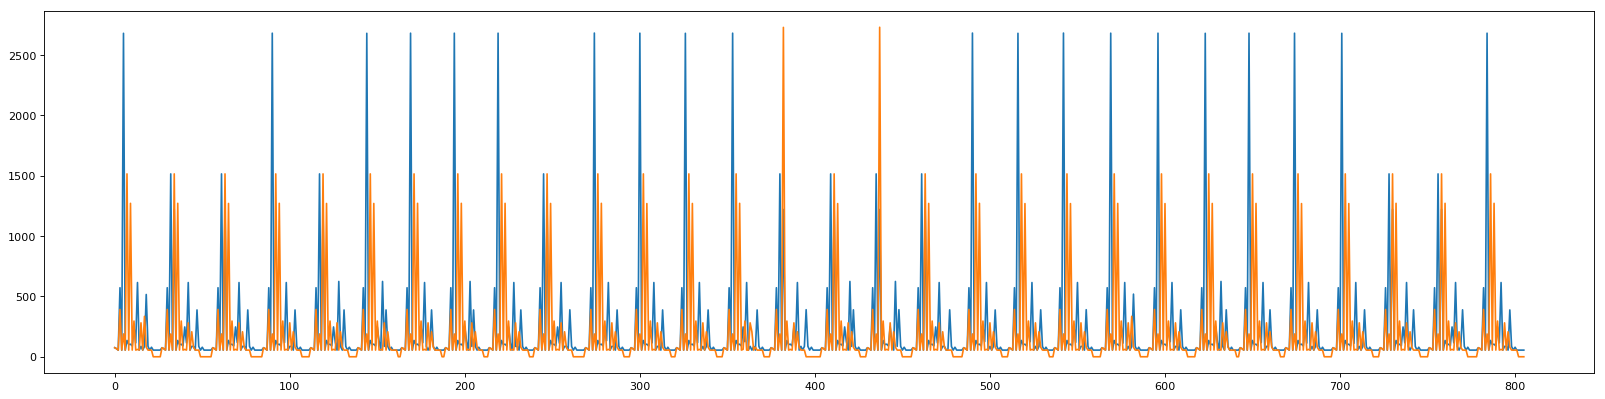

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')

l = []
l2 = []

for i in range(0, len(dohFlows)):
    for j in range(0, len(dohFlows[i].packets)):
        if j < len(dotFlows[i].packets):
            l2.append(dotFlows[i].packets[j].features['packet']['size'])
        else:
            l2.append(-1)
        l.append(dohFlows[i].packets[j].features['packet']['size'])


plt.plot(l)
plt.plot(l2)
plt.show()

Extract from flow following features:
- packet size max, min, std, mean, sum
- each tcpflag count
- payload 0 count
- payload size max, min, std, mean, sum
- packets count

In [7]:
dohStat = dohFlows[0].extractStatisticsFromDataFrame(dohFlows[0].flows[0].getDataFramePackets())
dotStat = dotFlows[0].extractStatisticsFromDataFrame(dotFlows[0].flows[0].getDataFramePackets())

print(dohStat)
print(dotStat)

{'packet.size.min': 54.0, 'packet.size.max': 2679.0, 'packet.size.std': 515.0253942235826, 'packet.size.mean': 230.8148148148148, 'packet.size.sum': 6232, 'payload.size.min': 0.0, 'payload.size.max': 2625.0, 'payload.size.std': 515.4260484259711, 'payload.size.mean': 175.62962962962962, 'payload.size.sum': 4742, 'payload.size.0count': 13, 'packet.count': 27, 'tcp.flags.push.count': 14, 'tcp.flags.ns.count': 0, 'tcp.flags.cwr.count': 0, 'tcp.flags.ecn.count': 0, 'tcp.flags.urg.count': 0, 'tcp.flags.ack.count': 26, 'tcp.flags.reset.count': 0, 'tcp.flags.syn.count': 2, 'tcp.flags.fin.count': 2}
{'packet.size.min': 54.0, 'packet.size.max': 1514.0, 'packet.size.std': 391.5253000842482, 'packet.size.mean': 233.8181818181818, 'packet.size.sum': 5144, 'payload.size.min': 0.0, 'payload.size.max': 1460.0, 'payload.size.std': 392.18867488742796, 'payload.size.mean': 178.36363636363637, 'payload.size.sum': 3924, 'payload.size.0count': 13, 'packet.count': 22, 'tcp.flags.push.count': 8, 'tcp.flags.n

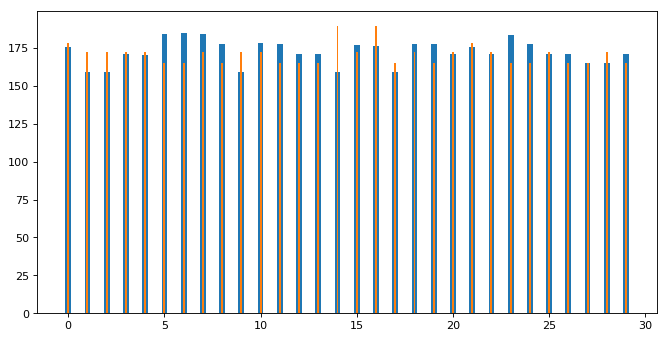

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')


dohFlowsStats = pd.DataFrame([dohFlow.extractStatisticsFromDataFrame(dohFlow.flows[0].getDataFramePackets()) for dohFlow in dohFlows])
dotFlowsStats = pd.DataFrame([dotFlow.extractStatisticsFromDataFrame(dotFlow.flows[0].getDataFramePackets()) for dotFlow in dotFlows])


ax = plt.subplot(111)
ax.bar(np.arange(len(dohFlowsStats)), dohFlowsStats['payload.size.mean'], 0.3)
ax.bar(np.arange(len(dotFlowsStats)), dotFlowsStats['payload.size.mean'], 0.1)
plt.show()

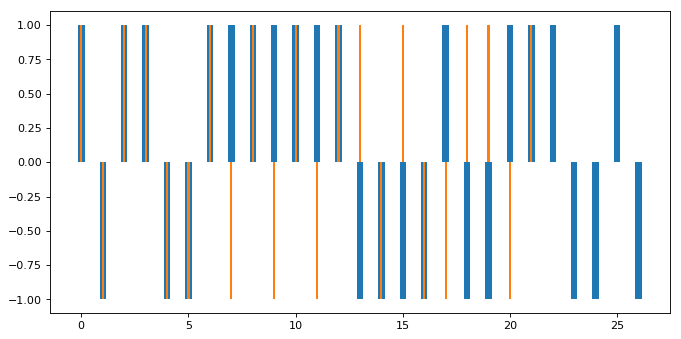

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')


dohDirections = dohFlows[0].flows[0].getPacketDirections()
dotDirections = dotFlows[0].flows[0].getPacketDirections()

ax = plt.subplot(111)
ax.bar(np.arange(len(dohDirections)), dohDirections, 0.3)
ax.bar(np.arange(len(dotDirections)), dotDirections, 0.1)
plt.show()

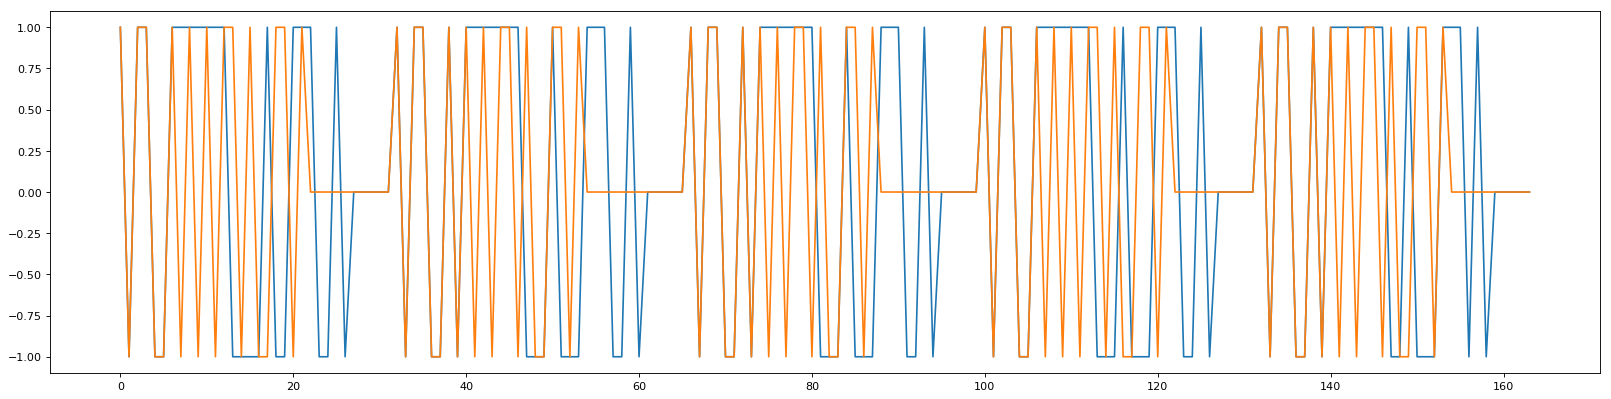

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')

l = []
l2 = []

for index in range(0,5):
    l += dohFlows[index].flows[0].getPacketDirections()
    l2 += dotFlows[index].flows[0].getPacketDirections()
    
    if len(l) < len(l2):
        l += [0 for i in range(len(l2)-len(l))]
    elif len(l2) < len(l):
        l2 += [0 for i in range(len(l)-len(l2))]
        
    l += [0 for i in range(5)]
    l2 += [0 for i in range(5)]

plt.plot(l)
plt.plot(l2)
plt.show()

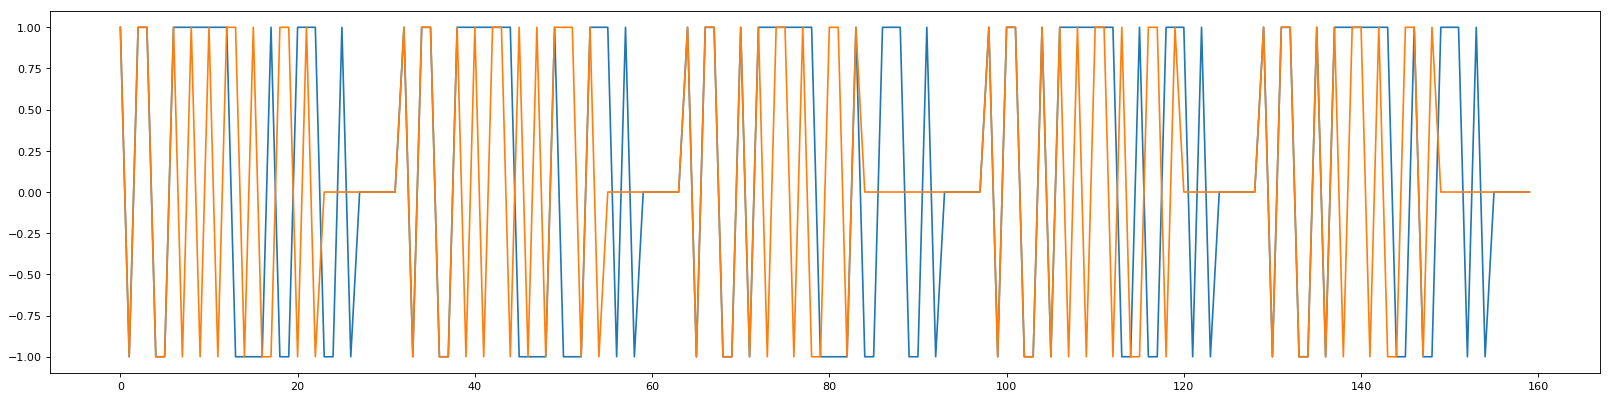

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')

l = []
l2 = []

for index in range(12,17):
    l += dohFlows[index].flows[0].getPacketDirections()
    l2 += dotFlows[index].flows[0].getPacketDirections()
    
    if len(l) < len(l2):
        l += [0 for i in range(len(l2)-len(l))]
    elif len(l2) < len(l):
        l2 += [0 for i in range(len(l)-len(l2))]
        
    l += [0 for i in range(5)]
    l2 += [0 for i in range(5)]

plt.plot(l)
plt.plot(l2)
plt.show()